## Feature Engineering

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from src.modules.feature_engineering import scale_encoder, num_null_replacement, print_null_features
from src.modules.load_source_data import load_data_set, load_agg_data

In [2]:
# get X and y (target variable)
# Load data
X, y = load_data_set()

# Save y
y.to_csv('./data/target.csv', index=False)
print(X.shape)
print(y.shape)

(10917, 27)
(10917,)


In [3]:
pd.set_option("display.max_columns", None)
X.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour
0,2018-09-28,WN,WN,WN,5745,WN,N916WN,5745,14570,RNO,"Reno, NV",12889,LAS,"Las Vegas, NV",2135,2245,N,70,1,345,2018,9,28,5,39,21,22
1,2018-09-28,UA,UA_CODESHARE,UA,6183,YV,N88332,6183,12264,IAD,"Washington, DC",10423,AUS,"Austin, TX",1720,1954,N,214,1,1297,2018,9,28,5,39,17,19
2,2018-09-28,DL,DL_CODESHARE,DL,5289,9E,N923XJ,5289,13487,MSP,"Minneapolis, MN",14683,SAT,"San Antonio, TX",1310,1612,N,182,1,1097,2018,9,28,5,39,13,16
3,2018-09-28,WN,WN,WN,4414,WN,N429WN,4414,12889,LAS,"Las Vegas, NV",14057,PDX,"Portland, OR",825,1045,N,140,1,763,2018,9,28,5,39,8,10
4,2018-09-28,UA,UA_CODESHARE,UA,3419,YX,N865RW,3419,11618,EWR,"Newark, NJ",11433,DTW,"Detroit, MI",845,1039,N,114,1,488,2018,9,28,5,39,8,10


In [4]:
# drop features
train = X.copy()
to_drop = ['mkt_carrier', 'tail_num', 'origin_city_name', 'dest_city_name', 'dup', 'fl_date', 'branded_code_share', 'op_unique_carrier', 'origin', 'dest', 'flights']
train = train.drop(to_drop, axis=1)

In [5]:
train.shape

(10917, 16)

In [6]:
#load features - Passengers, fuel_comsumption
train = load_agg_data(train)

In [7]:
train.shape

(10917, 52)

In [8]:
train.head()

,mkt_unique_carrier,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_seats,month_flight_passengers,month_flight_avg_seats,month_flight_avg_passengers,carrier_month_seats,carrier_month_passengers,carrier_month_avg_seats,carrier_month_avg_passengers,month_avg_fuel_comsumption,orig_airport_month_flight_seats,orig_airport_month_passengers,dest_airport_month_flight_seats,dest_airport_month_passengers
0,WN,5745,5745,14570,12889,2135,2245,70,345,2018,9,28,5,39,21,22,-2.489642,54.472693,12.267857,0.678571,9.767857,0.000000,17.642857,4.561924,53.954964,12.050279,1.318436,7.776536,0.128492,27.944134,11.378446,54.583960,5.500000,0.000000,5.277778,0.0,41.259259,7759,55700,191107.0,153579.0,155.233728,123.361095,78901284,62539560,153.984737,121.514593,157453740.2,2131372,1687478,23377952,19451761
1,UA,6183,6183,12264,10423,1720,1954,214,1297,2018,9,28,5,39,17,19,5.452514,170.122905,30.250000,35.214286,3.678571,0.000000,36.607143,2.953947,181.822368,32.319149,18.319149,10.680851,0.000000,14.787234,20.541176,178.019608,33.278689,52.721311,14.229508,0.0,25.803279,31077,21605,26027.0,20091.0,161.071429,123.703727,52064566,42524634,168.758576,131.991327,132759727.6,11855870,9366248,7133372,5715225
2,DL,5289,5289,13487,14683,1310,1612,182,1097,2018,9,28,5,39,13,16,-3.391304,147.204969,16.333333,20.571429,6.476190,0.000000,9.761905,-3.436620,147.922535,23.470588,0.294118,11.823529,0.000000,9.784314,-0.220472,148.924084,20.407895,4.605263,11.342105,0.0,14.723684,53708,14015,317.0,239.0,158.500000,119.500000,71810689,59616398,158.622182,121.712685,160548792.8,18266248,14989228,4653581,3554490
3,WN,4414,4414,12889,14057,825,1045,140,763,2018,9,28,5,39,8,10,-4.420091,111.223744,11.875000,0.000000,2.750000,0.000000,29.500000,2.273481,114.287293,15.222222,0.000000,3.126984,0.412698,23.444444,-4.157692,115.765385,16.846154,0.000000,2.423077,0.0,8.884615,55700,28911,88465.0,76357.0,156.714286,138.948894,78901284,62539560,153.984737,121.514593,157453740.2,23377952,19451761,9454325,7805934
4,UA,3419,3419,11618,11433,845,1039,114,488,2018,9,28,5,39,8,10,1.895141,82.332481,8.623188,0.086957,23.971014,0.086957,26.188406,10.527692,85.255385,14.606742,3.825843,12.342697,0.000000,31.960674,1.618056,84.008681,13.100840,2.369748,18.168067,0.0,11.075630,52801,57803,5435.0,2893.0,165.329966,107.688552,52064566,42524634,168.758576,131.991327,132759727.6,20668884,16967280,17356031,14022587


In [9]:
sorted(list(train.columns))

['arr_hour_avg_air_time',
 'arr_hour_avg_arr_delay',
 'arr_hour_avg_carrier_delay',
 'arr_hour_avg_late_aircraft_delay',
 'arr_hour_avg_nas_delay',
 'arr_hour_avg_security_delay',
 'arr_hour_avg_weather_delay',
 'carrier_month_avg_passengers',
 'carrier_month_avg_seats',
 'carrier_month_passengers',
 'carrier_month_seats',
 'crs_arr_hour',
 'crs_arr_time',
 'crs_dep_hour',
 'crs_dep_time',
 'crs_elapsed_time',
 'day',
 'day_of_week',
 'day_of_week_avg_air_time',
 'day_of_week_avg_arr_delay',
 'day_of_week_avg_carrier_delay',
 'day_of_week_avg_late_aircraft_delay',
 'day_of_week_avg_nas_delay',
 'day_of_week_avg_security_delay',
 'day_of_week_avg_weather_delay',
 'dest_airport_id',
 'dest_airport_month_flight_seats',
 'dest_airport_month_passengers',
 'dest_total_flights',
 'distance',
 'mkt_carrier_fl_num',
 'mkt_unique_carrier',
 'month',
 'month_avg_air_time',
 'month_avg_arr_delay',
 'month_avg_carrier_delay',
 'month_avg_fuel_comsumption',
 'month_avg_late_aircraft_delay',
 'month_

In [10]:
# Remove nulls for numeric values
train_n_null = num_null_replacement(train)

Missing data:
-------------
                                     Total   Percent
month_flight_avg_passengers           2110  0.193277
month_flight_seats                    2110  0.193277
month_flight_passengers               2110  0.193277
month_flight_avg_seats                2110  0.193277
arr_hour_avg_weather_delay              31  0.002840
arr_hour_avg_security_delay             31  0.002840
arr_hour_avg_late_aircraft_delay        31  0.002840
arr_hour_avg_nas_delay                  31  0.002840
arr_hour_avg_carrier_delay              31  0.002840
month_avg_late_aircraft_delay           25  0.002290
month_avg_security_delay                25  0.002290
month_avg_nas_delay                     25  0.002290
month_avg_weather_delay                 25  0.002290
month_avg_carrier_delay                 25  0.002290
day_of_week_avg_nas_delay                5  0.000458
day_of_week_avg_weather_delay            5  0.000458
day_of_week_avg_security_delay           5  0.000458
day_of_week_avg_la

In [11]:
train_n_null.dtypes[train_n_null.dtypes == 'object']

mkt_unique_carrier    object
dtype: object

In [12]:
train_cleaned, scaler = scale_encoder(train_n_null)

In [13]:
train_cleaned.head()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,month_avg_arr_delay,month_avg_air_time,month_avg_carrier_delay,month_avg_weather_delay,month_avg_nas_delay,month_avg_security_delay,month_avg_late_aircraft_delay,day_of_week_avg_arr_delay,day_of_week_avg_air_time,day_of_week_avg_carrier_delay,day_of_week_avg_weather_delay,day_of_week_avg_nas_delay,day_of_week_avg_security_delay,day_of_week_avg_late_aircraft_delay,arr_hour_avg_arr_delay,arr_hour_avg_air_time,arr_hour_avg_carrier_delay,arr_hour_avg_weather_delay,arr_hour_avg_nas_delay,arr_hour_avg_security_delay,arr_hour_avg_late_aircraft_delay,origin_total_flights,dest_total_flights,month_flight_seats,month_flight_passengers,month_flight_avg_seats,month_flight_avg_passengers,carrier_month_seats,carrier_month_passengers,carrier_month_avg_seats,carrier_month_avg_passengers,month_avg_fuel_comsumption,orig_airport_month_flight_seats,orig_airport_month_passengers,dest_airport_month_flight_seats,dest_airport_month_passengers,mkt_unique_carrier_AA,mkt_unique_carrier_AS,mkt_unique_carrier_B6,mkt_unique_carrier_DL,mkt_unique_carrier_F9,mkt_unique_carrier_G4,mkt_unique_carrier_HA,mkt_unique_carrier_NK,mkt_unique_carrier_UA,mkt_unique_carrier_VX,mkt_unique_carrier_WN
0,1.639344,1.637533,1.249822,0.139943,1.669500,1.496425,-0.940719,-0.714551,-1.0227,0.711785,1.403728,1.044264,0.829365,1.658519,1.465980,-0.865161,-0.764817,-0.495238,-0.355287,-0.385708,-0.104554,-0.554475,-0.113302,-0.773275,-0.646962,-0.422194,-0.646617,0.069482,0.095769,0.602665,-0.764446,-0.896977,-0.450019,-0.823479,-0.132756,1.005826,-1.036325,0.192770,1.273789,1.181387,0.482194,0.449679,0.771033,0.598807,-0.502302,-0.631039,0.302710,-1.058174,-1.044471,0.447680,0.438602,0,0,0,0,0,0,0,0,0,0,1
1,1.874825,1.872800,-0.259594,-1.486113,0.819180,0.925715,1.056118,0.892107,-1.0227,0.711785,1.403728,1.044264,0.829365,0.836395,0.877341,0.014659,0.898684,0.538038,3.849905,-0.864249,-0.104554,0.647710,-0.332131,1.066972,0.859174,2.509518,-0.389650,-0.186155,-0.936633,1.518063,1.011059,0.546396,5.604344,-0.071482,-0.132756,0.093601,-0.439768,-0.681333,-0.539949,-0.552716,0.572742,0.455905,-0.380997,-0.423095,0.575237,0.187464,-0.187404,-0.370778,-0.405274,-0.704952,-0.710109,0,0,0,0,0,0,0,0,1,0,0
2,1.394186,1.392597,0.540933,1.322890,-0.020895,0.254983,0.612376,0.554573,-1.0227,0.711785,1.403728,1.044264,0.829365,0.014271,0.288703,-0.965046,0.569035,-0.261631,2.066938,-0.644392,-0.104554,-1.054065,-1.201820,0.579091,0.201657,-0.598834,-0.288549,-0.186155,-1.329205,-0.556120,0.592548,-0.122367,0.078836,-0.314041,-0.132756,-0.560326,0.139213,-0.875920,-0.822426,-0.810608,0.532857,0.379517,0.466653,0.449559,-0.164067,-0.615563,0.364139,0.082353,0.062795,-0.880906,-0.890800,0,0,0,1,0,0,0,0,0,0,0
3,0.923763,0.922600,0.149506,0.910111,-1.014643,-0.857021,0.029966,-0.009107,-1.0227,0.711785,1.403728,1.044264,0.829365,-1.013384,-0.888574,-1.079013,0.051485,-0.517812,-0.437912,-0.937223,-0.104554,0.197173,-0.424735,0.095018,-0.411262,-0.649553,-1.057998,0.634918,-0.257315,-0.949466,0.115591,-0.307434,-0.450019,-1.063291,-0.132756,-0.904953,0.190176,-0.494027,0.146059,0.178219,0.505159,0.732933,0.771033,0.598807,-0.502302,-0.631039,0.302710,0.443684,0.434265,-0.540269,-0.535275,0,0,0,0,0,0,0,0,0,0,1
4,0.388824,0.388147,-0.682440,-0.820129,-0.973664,-0.868788,-0.330574,-0.473215,-1.0227,0.711785,1.403728,1.044264,0.829365,-1.013384,-0.888574,-0.379421,-0.364084,-0.704665,-0.427324,0.730482,-0.010909,-0.012756,0.698577,-0.322804,-0.456997,0.010200,-0.242614,-0.186155,0.410941,-0.372442,-0.341199,-0.502040,-0.177884,0.259379,-0.132756,-0.775637,0.116009,0.246685,-0.766194,-0.776130,0.638795,0.164884,-0.380997,-0.423095,0.575237,0.187464,-0.187404,0.252188,0.227452,0.020395,-0.015410,0,0,0,0,0,0,0,0,1,0,0


In [14]:
train_cleaned.to_csv('./data/train.csv', index=False)

#### Feature engineering - Clustering

In [15]:
X.shape

(10917, 27)

In [16]:
X.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour
0,2018-09-28,WN,WN,WN,5745,WN,N916WN,5745,14570,RNO,"Reno, NV",12889,LAS,"Las Vegas, NV",2135,2245,N,70,1,345,2018,9,28,5,39,21,22
1,2018-09-28,UA,UA_CODESHARE,UA,6183,YV,N88332,6183,12264,IAD,"Washington, DC",10423,AUS,"Austin, TX",1720,1954,N,214,1,1297,2018,9,28,5,39,17,19
2,2018-09-28,DL,DL_CODESHARE,DL,5289,9E,N923XJ,5289,13487,MSP,"Minneapolis, MN",14683,SAT,"San Antonio, TX",1310,1612,N,182,1,1097,2018,9,28,5,39,13,16
3,2018-09-28,WN,WN,WN,4414,WN,N429WN,4414,12889,LAS,"Las Vegas, NV",14057,PDX,"Portland, OR",825,1045,N,140,1,763,2018,9,28,5,39,8,10
4,2018-09-28,UA,UA_CODESHARE,UA,3419,YX,N865RW,3419,11618,EWR,"Newark, NJ",11433,DTW,"Detroit, MI",845,1039,N,114,1,488,2018,9,28,5,39,8,10


In [17]:
train_cluster = X.copy()

train_cluster = train_cluster.drop(['fl_date','branded_code_share', 'mkt_carrier', 'mkt_carrier_fl_num',\
                    'op_unique_carrier', 'op_carrier_fl_num', 'tail_num', 'origin', 'origin_city_name',\
                   'dest', 'dest_city_name', 'dup', 'flights'], axis=1)

In [18]:
total = train_cluster.isnull().sum().sort_values(ascending=False)
percent = (train_cluster.isnull().sum()/train_cluster.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
crs_arr_hour,0,0.0
crs_dep_hour,0,0.0
week_of_year,0,0.0
day_of_week,0,0.0
day,0,0.0
month,0,0.0
year,0,0.0
distance,0,0.0
crs_elapsed_time,0,0.0
crs_arr_time,0,0.0


In [19]:
train_cluster.dtypes

mkt_unique_carrier    object
origin_airport_id      int64
dest_airport_id        int64
crs_dep_time           int64
crs_arr_time           int64
crs_elapsed_time       int64
distance               int64
year                   int64
month                  int64
day                    int64
day_of_week            int64
week_of_year           int64
crs_dep_hour           int64
crs_arr_hour           int64
dtype: object

In [20]:
train_cluster, scaler = scale_encoder(train_cluster)

In [21]:
filter = train_cluster['mkt_unique_carrier_AS'].notna()
train_cluster[filter].shape

(10917, 24)

In [22]:
total = train_cluster.isnull().sum().sort_values(ascending=False)
percent = (train_cluster.isnull().sum()/train_cluster.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
mkt_unique_carrier_WN,205,0.018432
mkt_unique_carrier_VX,205,0.018432
dest_airport_id,205,0.018432
crs_dep_time,205,0.018432
crs_arr_time,205,0.018432
crs_elapsed_time,205,0.018432
distance,205,0.018432
year,205,0.018432
month,205,0.018432
day,205,0.018432


In [23]:
num_null_replacement(train_cluster)

Missing data:
-------------
                       Total   Percent
mkt_unique_carrier_WN    205  0.018432
mkt_unique_carrier_VX    205  0.018432
dest_airport_id          205  0.018432
crs_dep_time             205  0.018432
crs_arr_time             205  0.018432
crs_elapsed_time         205  0.018432
distance                 205  0.018432
year                     205  0.018432
month                    205  0.018432
day                      205  0.018432
day_of_week              205  0.018432
week_of_year             205  0.018432
crs_dep_hour             205  0.018432
crs_arr_hour             205  0.018432
mkt_unique_carrier_AA    205  0.018432
mkt_unique_carrier_AS    205  0.018432
mkt_unique_carrier_B6    205  0.018432
mkt_unique_carrier_DL    205  0.018432
mkt_unique_carrier_F9    205  0.018432
mkt_unique_carrier_G4    205  0.018432
mkt_unique_carrier_HA    205  0.018432
mkt_unique_carrier_NK    205  0.018432
mkt_unique_carrier_UA    205  0.018432
origin_airport_id        205  0.0184

,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,day_of_week,week_of_year,crs_dep_hour,crs_arr_hour,mkt_unique_carrier_AA,mkt_unique_carrier_AS,mkt_unique_carrier_B6,mkt_unique_carrier_DL,mkt_unique_carrier_F9,mkt_unique_carrier_G4,mkt_unique_carrier_HA,mkt_unique_carrier_NK,mkt_unique_carrier_UA,mkt_unique_carrier_VX,mkt_unique_carrier_WN
0,1.249822,0.139943,1.669500,1.496425,-0.940719,-0.714551,-1.0227,0.711785,1.403728,1.044264,0.829365,1.658519,1.465980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.259594,-1.486113,0.819180,0.925715,1.056118,0.892107,-1.0227,0.711785,1.403728,1.044264,0.829365,0.836395,0.877341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.540933,1.322890,-0.020895,0.254983,0.612376,0.554573,-1.0227,0.711785,1.403728,1.044264,0.829365,0.014271,0.288703,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.149506,0.910111,-1.014643,-0.857021,0.029966,-0.009107,-1.0227,0.711785,1.403728,1.044264,0.829365,-1.013384,-0.888574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.682440,-0.820129,-0.973664,-0.868788,-0.330574,-0.473215,-1.0227,0.711785,1.403728,1.044264,0.829365,-1.013384,-0.888574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
# import scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch

# import Kmeans 
from sklearn.cluster import KMeans

def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()
    
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

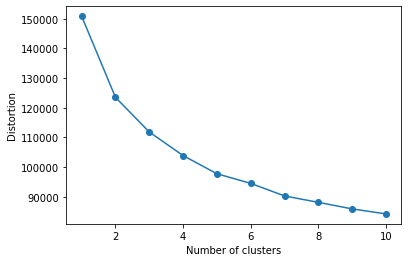

In [25]:
plot_distortion(train_cluster,max_clusters=10)

In [26]:
train_cluster.columns

Index(['origin_airport_id', 'dest_airport_id', 'crs_dep_time', 'crs_arr_time',
       'crs_elapsed_time', 'distance', 'year', 'month', 'day', 'day_of_week',
       'week_of_year', 'crs_dep_hour', 'crs_arr_hour', 'mkt_unique_carrier_AA',
       'mkt_unique_carrier_AS', 'mkt_unique_carrier_B6',
       'mkt_unique_carrier_DL', 'mkt_unique_carrier_F9',
       'mkt_unique_carrier_G4', 'mkt_unique_carrier_HA',
       'mkt_unique_carrier_NK', 'mkt_unique_carrier_UA',
       'mkt_unique_carrier_VX', 'mkt_unique_carrier_WN'],
      dtype='object')

In [27]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

For n_clusters = 2 The average silhouette_score is : 0.16619190727290536


TypeError: '(slice(None, None, None), 0)' is an invalid key

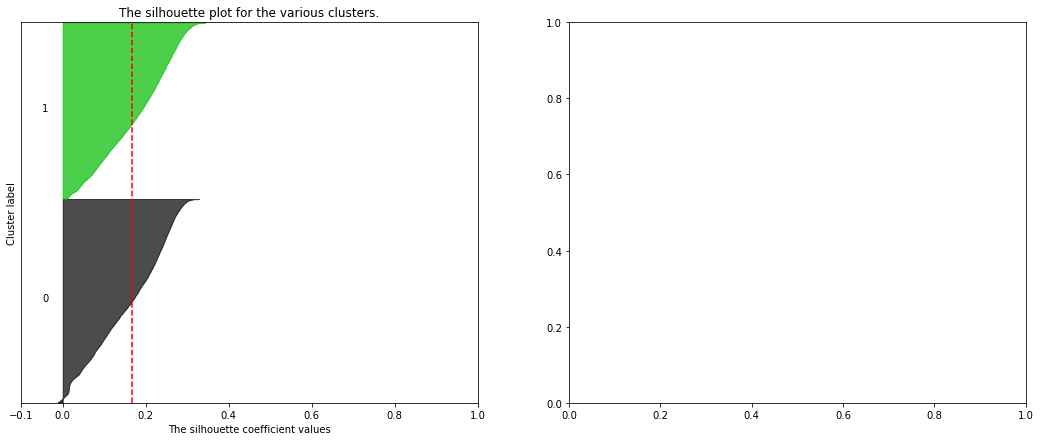

In [34]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = train_cluster
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    print(X[:,0])
    print(X[:,1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [46]:
from sklearn.decomposition import PCA
import plotly.express as px
pca = PCA(n_components=2)
components = pca.fit_transform(X)
PCA(n_components=2)

PCA(n_components=2)

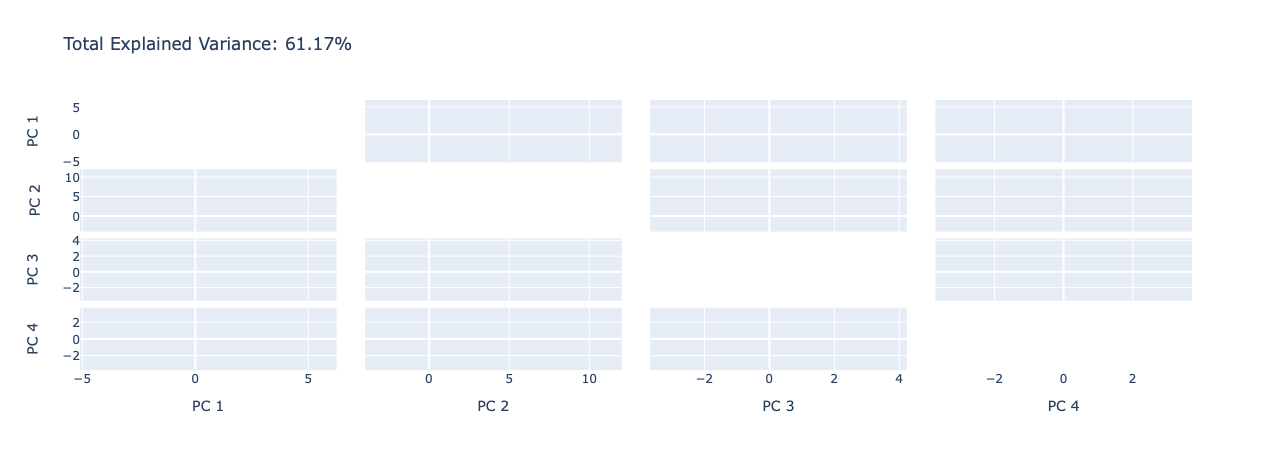

In [54]:
n_components = 4

pca = PCA(n_components=n_components)
components = pca.fit_transform(train_cluster)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color=boston.target,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

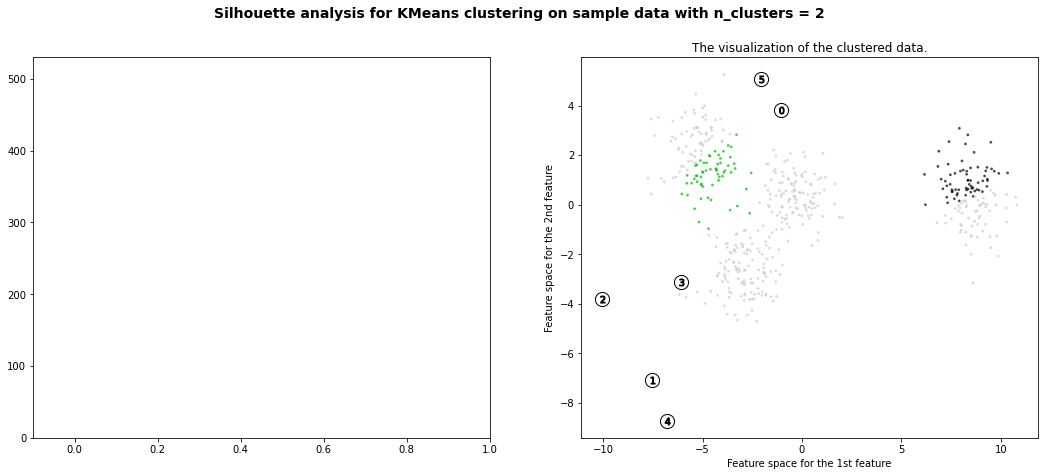

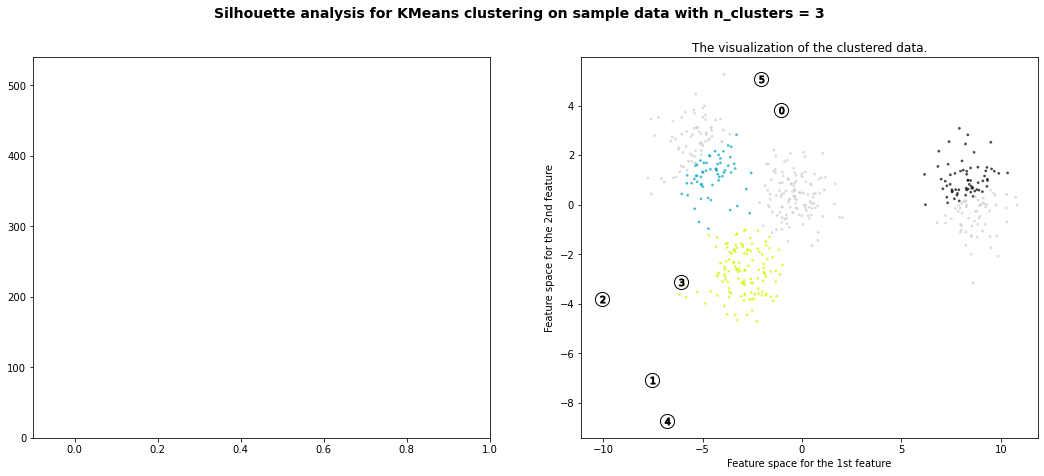

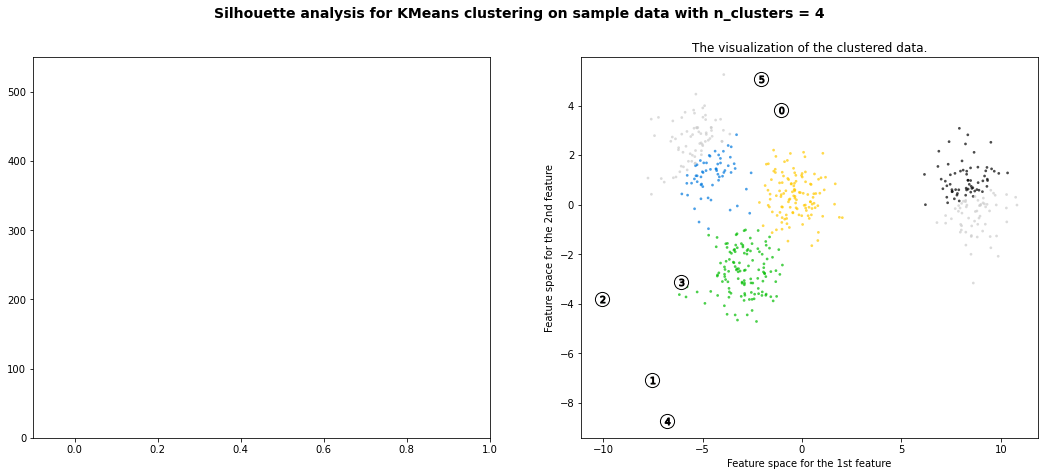

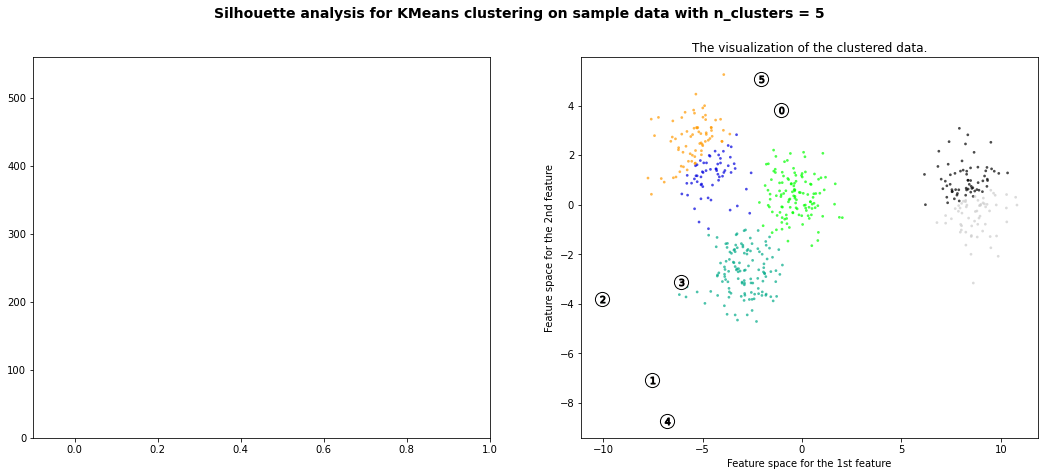

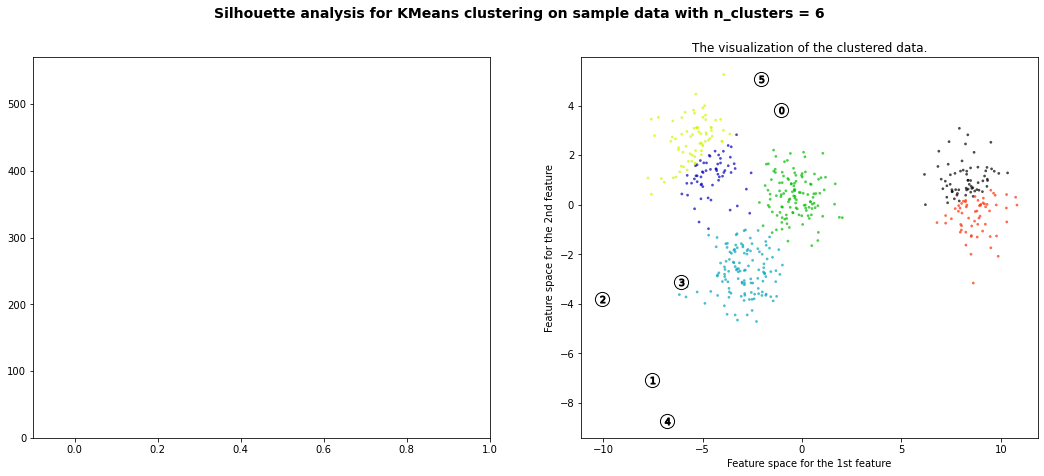

In [50]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(components[:, 0], components[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()